<a href="https://colab.research.google.com/github/Ajogeorge29/Monkey_Challenge/blob/main/MONKEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install awscli

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 115.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.1.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.


In [ ]:
!aws s3 ls --no-sign-request s3://monkey-training/


                           PRE annotations/
                           PRE images/
                           PRE metadata/
2024-09-26 15:12:03       2605 ReadMe.txt


In [ ]:
!aws s3 ls --no-sign-request s3://monkey-training/annotations/
!aws s3 ls --no-sign-request s3://monkey-training/images/
!aws s3 ls --no-sign-request s3://monkey-training/metadata/


                           PRE json/
                           PRE xml/
2024-11-13 10:19:44       6148 .DS_Store
                           PRE ihc/
                           PRE pas-cpg/
                           PRE pas-diagnostic/
                           PRE pas-original/
                           PRE tissue-masks/
2024-09-12 17:26:48       4096 ._context-information.xlsx
2024-11-13 09:14:08      31613 context-information.xlsx


In [ ]:
!aws s3 cp --no-sign-request s3://monkey-training/images/ ./images/ --recursive
!aws s3 cp --no-sign-request s3://monkey-training/annotations/ ./annotations/ --recursive
!aws s3 cp --no-sign-request s3://monkey-training/metadata/ ./metadata/ --recursive


download: s3://monkey-training/images/ihc/A_P000003_IHC_CPG.tif to images/ihc/A_P000003_IHC_CPG.tif
download: s3://monkey-training/images/ihc/A_P000001_IHC_CPG.tif to images/ihc/A_P000001_IHC_CPG.tif
download: s3://monkey-training/images/ihc/A_P000002_IHC_CPG.tif to images/ihc/A_P000002_IHC_CPG.tif
download: s3://monkey-training/images/ihc/A_P000004_IHC_CPG.tif to images/ihc/A_P000004_IHC_CPG.tif
download: s3://monkey-training/images/ihc/A_P000005_IHC_CPG.tif to images/ihc/A_P000005_IHC_CPG.tif
download: s3://monkey-training/images/ihc/A_P000011_IHC_CPG.tif to images/ihc/A_P000011_IHC_CPG.tif
download: s3://monkey-training/images/ihc/A_P000007_IHC_CPG.tif to images/ihc/A_P000007_IHC_CPG.tif
download: s3://monkey-training/images/ihc/A_P000014_IHC_CPG.tif to images/ihc/A_P000014_IHC_CPG.tif
download: s3://monkey-training/images/ihc/A_P000016_IHC_CPG.tif to images/ihc/A_P000016_IHC_CPG.tif
download: s3://monkey-training/images/ihc/A_P000006_IHC_CPG.tif to images/ihc/A_P000006_IHC_CPG.tif


In [ ]:
!ls ./images/
!ls ./annotations/
!ls ./metadata/


ihc  pas-cpg  pas-diagnostic  pas-original  tissue-masks
json  xml
context-information.xlsx


In [ ]:
!pip install monai numpy matplotlib opencv-python
!pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.9 MB/s eta 0:00:00


In [ ]:
#dataset loading and visualisation

In [ ]:
import os

# Define the main directories
dataset_path = "/content"  # Update if needed
images_path = os.path.join(dataset_path, "images")
annotations_path = os.path.join(dataset_path, "annotations")
metadata_path = os.path.join(dataset_path, "metadata")

# Check subfolders in images
image_subfolders = os.listdir(images_path)
print("Subfolders in 'images':", image_subfolders)

# List sample files from each subfolder
for subfolder in image_subfolders:
    subfolder_path = os.path.join(images_path, subfolder)
    if os.path.isdir(subfolder_path):
        sample_files = os.listdir(subfolder_path)[:5]
        print(f"Sample files in '{subfolder}': {sample_files}")

# Check annotations
annotation_files = os.listdir(annotations_path)[:5]
print("Sample annotation files:", annotation_files)

# Check metadata
metadata_files = os.listdir(metadata_path)[:5]
print("Sample metadata files:", metadata_files)


Subfolders in 'images': ['pas-original', 'pas-cpg', 'pas-diagnostic', 'tissue-masks', 'ihc']
Sample files in 'pas-original': ['D_P000012_PAS_Original.tif', 'D_P000016_PAS_Original.tif', 'D_P000019_PAS_Original.tif', 'D_P000006_PAS_Original.tif', 'D_P000004_PAS_Original.tif']
Sample files in 'pas-cpg': ['A_P000038_PAS_CPG.tif', 'A_P000030_PAS_CPG.tif', 'A_P000005_PAS_CPG.tif', 'C_P000038_PAS_CPG.tif', 'B_P000017_PAS_CPG.tif']
Sample files in 'pas-diagnostic': ['C_P000031_PAS_Diagnostic.tif', 'D_P000017_PAS_Diagnostic.tif', 'B_P000002_PAS_Diagnostic.tif', 'C_P000039_PAS_Diagnostic.tif', 'C_P000040_PAS_Diagnostic.tif']
Sample files in 'tissue-masks': ['D_P000010_mask.tif', 'C_P000006_mask.tif', 'D_P000001_mask.tif', 'A_P000035_mask.tif', 'B_P000004_mask.tif']
Sample files in 'ihc': ['A_P000017_IHC_CPG.tif', 'B_P000013_IHC_CPG.tif', 'B_P000004_IHC_CPG.tif', 'A_P000002_IHC_CPG.tif', 'A_P000036_IHC_CPG.tif']
Sample annotation files: ['json', 'xml', '.DS_Store']
Sample metadata files: ['conte

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Increase the decompression limit
Image.MAX_IMAGE_PIXELS = None

# Path to a sample image
sample_image_path = "/content/images/pas-original/D_P000012_PAS_Original.tif"

try:
    # Load and downsample the image for visualization
    image = Image.open(sample_image_path)
    resized_image = image.resize((1024, 1024))  # Resize to manageable resolution
    plt.imshow(resized_image)
    plt.axis('off')
    plt.title("Resized Image")
    plt.show()
except Exception as e:
    print(f"Error loading image: {sample_image_path}")
    print(f"Error: {e}")


Error loading image: /content/images/pas-original/D_P000012_PAS_Original.tif
Error: -2


In [ ]:
import os

sample_image_path = "/content/images/pas-original/D_P000012_PAS_Original.tif"

if os.path.exists(sample_image_path):
    print("File exists.")
else:
    print("File not found.")


File exists.


In [ ]:
# Install OpenSlide and its dependencies
!apt-get update
!apt-get install -y openslide-tools

# Install the Python wrapper for OpenSlide
!pip install openslide-python


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,113 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,613 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,482 kB]
Get:13 http://archive.ubuntu.com/ubuntu jamm

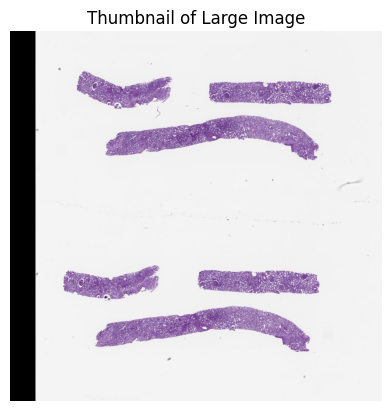

In [ ]:
import openslide
import matplotlib.pyplot as plt

sample_image_path = "/content/images/pas-original/D_P000012_PAS_Original.tif"

try:
    # Open the image with OpenSlide
    slide = openslide.OpenSlide(sample_image_path)
    thumbnail = slide.get_thumbnail((1024, 1024))  # Generate a thumbnail
    plt.imshow(thumbnail)
    plt.axis('off')
    plt.title("Thumbnail of Large Image")
    plt.show()
except Exception as e:
    print(f"Error loading image: {sample_image_path}")
    print(f"Error: {e}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
output_dir = '/content/drive/My Drive/MONKEY_Challenge_Outputs'
os.makedirs(output_dir, exist_ok=True)


In [ ]:
image_dir = '/content/images'


In [ ]:
# Save thumbnails in Google Drive
thumbnail_output_dir = os.path.join(output_dir, 'thumbnails')
os.makedirs(thumbnail_output_dir, exist_ok=True)

for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith(".tif"):
            file_path = os.path.join(root, file)
            try:
                slide = openslide.OpenSlide(file_path)
                thumbnail = slide.get_thumbnail((1024, 1024))  # Adjust size as needed
                thumbnail_path = os.path.join(thumbnail_output_dir, f"{file}_thumbnail.png")
                thumbnail.save(thumbnail_path, "PNG")
                print(f"Saved thumbnail: {thumbnail_path}")
            except Exception as e:
                print(f"Error creating thumbnail for {file_path}: {e}")


Saved thumbnail: /content/drive/My Drive/MONKEY_Challenge_Outputs/thumbnails/D_P000012_PAS_Original.tif_thumbnail.png
Saved thumbnail: /content/drive/My Drive/MONKEY_Challenge_Outputs/thumbnails/D_P000016_PAS_Original.tif_thumbnail.png
Error creating thumbnail for /content/images/pas-original/D_P000019_PAS_Original.tif: Cannot read raw tile
Saved thumbnail: /content/drive/My Drive/MONKEY_Challenge_Outputs/thumbnails/D_P000006_PAS_Original.tif_thumbnail.png
Saved thumbnail: /content/drive/My Drive/MONKEY_Challenge_Outputs/thumbnails/D_P000004_PAS_Original.tif_thumbnail.png
Saved thumbnail: /content/drive/My Drive/MONKEY_Challenge_Outputs/thumbnails/D_P000003_PAS_Original.tif_thumbnail.png
Saved thumbnail: /content/drive/My Drive/MONKEY_Challenge_Outputs/thumbnails/D_P000014_PAS_Original.tif_thumbnail.png
Saved thumbnail: /content/drive/My Drive/MONKEY_Challenge_Outputs/thumbnails/D_P000011_PAS_Original.tif_thumbnail.png
Saved thumbnail: /content/drive/My Drive/MONKEY_Challenge_Outputs/t

In [ ]:
import os

thumbnail_dir = '/content/drive/MyDrive/MONKEY_Challenge_Outputs/thumbnails'
annotations_dir = '/content/annotations'
masks_dir = '/content/images/tissue-masks'

thumbnail_files = sorted([f.replace('.jpg', '') for f in os.listdir(thumbnail_dir) if f.endswith('.jpg')])
annotation_files = sorted([f.replace('.json', '').replace('.xml', '') for f in os.listdir(annotations_dir)])
mask_files = sorted([f.replace('_mask.tif', '') for f in os.listdir(masks_dir)])

print("Do thumbnails match annotations?", set(thumbnail_files) == set(annotation_files))
print("Do thumbnails match masks?", set(thumbnail_files) == set(mask_files))


Do thumbnails match annotations? False
Do thumbnails match masks? False


In [ ]:
# Compare thumbnail names, mask names, and annotation names
thumbnail_set = set(thumbnail_files)  # Generated earlier
annotation_set = set(annotation_files)
mask_set = set(mask_files)

# Check differences
print("Thumbnails not in annotations:", thumbnail_set - annotation_set)
print("Annotations not in thumbnails:", annotation_set - thumbnail_set)
print("Thumbnails not in masks:", thumbnail_set - mask_set)
print("Masks not in thumbnails:", mask_set - thumbnail_set)


Thumbnails not in annotations: set()
Annotations not in thumbnails: {'json', '.DS_Store', 'xml'}
Thumbnails not in masks: set()
Masks not in thumbnails: {'A_P000016', 'D_P000017', 'A_P000035', 'D_P000010', 'A_P000018', 'C_P000007', 'B_P000017', 'B_P000009', 'A_P000030', 'D_P000018', 'A_P000006', 'C_P000006', 'A_P000011', 'D_P000016', 'B_P000015', 'B_P000012', 'B_P000001', 'A_P000004', 'A_P000002', 'C_P000015', 'A_P000005', 'C_P000017', 'A_P000017', 'B_P000004', 'B_P000002', 'C_P000016', 'D_P000006', 'B_P000014', 'A_P000014', 'C_P000018', 'D_P000001', 'D_P000019', 'A_P000032', 'C_P000012', 'A_P000031', 'A_P000007', 'C_P000020', 'A_P000003', 'A_P000038', 'B_P000003', 'C_P000014', 'A_P000036', 'A_P000034', 'C_P000011', 'D_P000015', 'A_P000020', 'B_P000019', 'D_P000007', 'D_P000013', 'C_P000009', 'C_P000019', 'C_P000002', 'D_P000004', 'A_P000021', 'C_P000001', 'C_P000013', 'D_P000014', 'B_P000005', 'A_P000037', 'A_P000029', 'A_P000022', 'B_P000020', 'D_P000009', 'A_P000001', 'C_P000004', '

In [ ]:
# Normalize filenames for comparison
normalized_thumbnails = [name.split('_PAS')[0] for name in thumbnail_files]
normalized_annotations = [name.split('.')[0] for name in annotation_files]
normalized_masks = [name.split('_mask')[0] for name in mask_files]

# Compare normalized names
print("Normalized Thumbnails not in Annotations:", set(normalized_thumbnails) - set(normalized_annotations))
print("Normalized Annotations not in Thumbnails:", set(normalized_annotations) - set(normalized_thumbnails))
print("Normalized Thumbnails not in Masks:", set(normalized_thumbnails) - set(normalized_masks))
print("Normalized Masks not in Thumbnails:", set(normalized_masks) - set(normalized_thumbnails))


Normalized Thumbnails not in Annotations: set()
Normalized Annotations not in Thumbnails: {'', 'json', 'xml'}
Normalized Thumbnails not in Masks: set()
Normalized Masks not in Thumbnails: {'A_P000016', 'D_P000017', 'A_P000035', 'D_P000010', 'A_P000018', 'C_P000007', 'B_P000017', 'B_P000009', 'A_P000030', 'D_P000018', 'A_P000006', 'C_P000006', 'A_P000011', 'D_P000016', 'B_P000015', 'B_P000012', 'B_P000001', 'A_P000004', 'A_P000002', 'C_P000015', 'A_P000005', 'C_P000017', 'A_P000017', 'B_P000004', 'B_P000002', 'C_P000016', 'D_P000006', 'B_P000014', 'A_P000014', 'C_P000018', 'D_P000001', 'D_P000019', 'A_P000032', 'C_P000012', 'A_P000031', 'A_P000007', 'C_P000020', 'A_P000003', 'A_P000038', 'B_P000003', 'C_P000014', 'A_P000036', 'A_P000034', 'C_P000011', 'D_P000015', 'A_P000020', 'B_P000019', 'D_P000007', 'D_P000013', 'C_P000009', 'C_P000019', 'C_P000002', 'D_P000004', 'A_P000021', 'C_P000001', 'C_P000013', 'D_P000014', 'B_P000005', 'A_P000037', 'A_P000029', 'A_P000022', 'B_P000020', 'D_P0

In [ ]:
# Normalize thumbnail names
normalized_thumbnails = {name.split('_PAS')[0] for name in thumbnail_files}

# Normalize mask names
normalized_masks = {name.split('_mask')[0] for name in mask_files}

# Find mismatches
masks_not_in_thumbnails = normalized_masks - normalized_thumbnails
thumbnails_not_in_masks = normalized_thumbnails - normalized_masks

print("Masks not in thumbnails:", masks_not_in_thumbnails)
print("Thumbnails not in masks:", thumbnails_not_in_masks)


Masks not in thumbnails: {'A_P000016', 'D_P000017', 'A_P000035', 'D_P000010', 'A_P000018', 'C_P000007', 'B_P000017', 'B_P000009', 'A_P000030', 'D_P000018', 'A_P000006', 'C_P000006', 'A_P000011', 'D_P000016', 'B_P000015', 'B_P000012', 'B_P000001', 'A_P000004', 'A_P000002', 'C_P000015', 'A_P000005', 'C_P000017', 'A_P000017', 'B_P000004', 'B_P000002', 'C_P000016', 'D_P000006', 'B_P000014', 'A_P000014', 'C_P000018', 'D_P000001', 'D_P000019', 'A_P000032', 'C_P000012', 'A_P000031', 'A_P000007', 'C_P000020', 'A_P000003', 'A_P000038', 'B_P000003', 'C_P000014', 'A_P000036', 'A_P000034', 'C_P000011', 'D_P000015', 'A_P000020', 'B_P000019', 'D_P000007', 'D_P000013', 'C_P000009', 'C_P000019', 'C_P000002', 'D_P000004', 'A_P000021', 'C_P000001', 'C_P000013', 'D_P000014', 'B_P000005', 'A_P000037', 'A_P000029', 'A_P000022', 'B_P000020', 'D_P000009', 'A_P000001', 'C_P000004', 'B_P000010', 'B_P000007', 'C_P000008', 'C_P000010', 'C_P000003', 'D_P000011', 'D_P000005', 'D_P000012', 'D_P000003', 'B_P000011',

In [ ]:
# Find masks without corresponding thumbnails
missing_thumbnails = masks_not_in_thumbnails

print("Missing thumbnails for masks:", missing_thumbnails)


Missing thumbnails for masks: {'A_P000016', 'D_P000017', 'A_P000035', 'D_P000010', 'A_P000018', 'C_P000007', 'B_P000017', 'B_P000009', 'A_P000030', 'D_P000018', 'A_P000006', 'C_P000006', 'A_P000011', 'D_P000016', 'B_P000015', 'B_P000012', 'B_P000001', 'A_P000004', 'A_P000002', 'C_P000015', 'A_P000005', 'C_P000017', 'A_P000017', 'B_P000004', 'B_P000002', 'C_P000016', 'D_P000006', 'B_P000014', 'A_P000014', 'C_P000018', 'D_P000001', 'D_P000019', 'A_P000032', 'C_P000012', 'A_P000031', 'A_P000007', 'C_P000020', 'A_P000003', 'A_P000038', 'B_P000003', 'C_P000014', 'A_P000036', 'A_P000034', 'C_P000011', 'D_P000015', 'A_P000020', 'B_P000019', 'D_P000007', 'D_P000013', 'C_P000009', 'C_P000019', 'C_P000002', 'D_P000004', 'A_P000021', 'C_P000001', 'C_P000013', 'D_P000014', 'B_P000005', 'A_P000037', 'A_P000029', 'A_P000022', 'B_P000020', 'D_P000009', 'A_P000001', 'C_P000004', 'B_P000010', 'B_P000007', 'C_P000008', 'C_P000010', 'C_P000003', 'D_P000011', 'D_P000005', 'D_P000012', 'D_P000003', 'B_P000

In [ ]:
# Filter out unmatched masks
valid_masks = [mask for mask in mask_files if mask.split('_mask')[0] in normalized_thumbnails]

print("Valid masks:", len(valid_masks))


Valid masks: 0


In [ ]:
print("Mask filenames:", [os.path.basename(mask) for mask in mask_files])
print("Thumbnail filenames:", [os.path.basename(thumb) for thumb in thumbnail_files])


Mask filenames: ['A_P000001', 'A_P000002', 'A_P000003', 'A_P000004', 'A_P000005', 'A_P000006', 'A_P000007', 'A_P000011', 'A_P000014', 'A_P000016', 'A_P000017', 'A_P000018', 'A_P000020', 'A_P000021', 'A_P000022', 'A_P000024', 'A_P000029', 'A_P000030', 'A_P000031', 'A_P000032', 'A_P000033', 'A_P000034', 'A_P000035', 'A_P000036', 'A_P000037', 'A_P000038', 'B_P000001', 'B_P000002', 'B_P000003', 'B_P000004', 'B_P000005', 'B_P000007', 'B_P000009', 'B_P000010', 'B_P000011', 'B_P000012', 'B_P000013', 'B_P000014', 'B_P000015', 'B_P000016', 'B_P000017', 'B_P000019', 'B_P000020', 'C_P000001', 'C_P000002', 'C_P000003', 'C_P000004', 'C_P000005', 'C_P000006', 'C_P000007', 'C_P000008', 'C_P000009', 'C_P000010', 'C_P000011', 'C_P000012', 'C_P000013', 'C_P000014', 'C_P000015', 'C_P000016', 'C_P000017', 'C_P000018', 'C_P000019', 'C_P000020', 'D_P000001', 'D_P000002', 'D_P000003', 'D_P000004', 'D_P000005', 'D_P000006', 'D_P000007', 'D_P000009', 'D_P000010', 'D_P000011', 'D_P000012', 'D_P000013', 'D_P0000

In [ ]:
import os

thumbnail_dir = '/content/drive/MyDrive/MONKEY_Challenge_Outputs/thumbnails'  # Replace with your thumbnail output directory
thumbnails = os.listdir(thumbnail_dir)
print(f"Number of thumbnails: {len(thumbnails)}")
print(f"Thumbnail filenames: {thumbnails[:5]}")


Number of thumbnails: 320
Thumbnail filenames: ['D_P000012_PAS_Original.tif_thumbnail.png', 'D_P000016_PAS_Original.tif_thumbnail.png', 'D_P000006_PAS_Original.tif_thumbnail.png', 'D_P000004_PAS_Original.tif_thumbnail.png', 'D_P000003_PAS_Original.tif_thumbnail.png']


In [ ]:
# Directory containing thumbnails
thumbnail_dir = '/content/drive/MyDrive/MONKEY_Challenge_Outputs/thumbnails'
thumbnails = os.listdir(thumbnail_dir)

# Normalize thumbnail filenames
normalized_thumbnails = [file.split('_')[0] for file in thumbnails]
print(f"Normalized Thumbnails: {normalized_thumbnails[:5]}")

# Mask filenames (already normalized)
mask_filenames = [os.path.splitext(mask)[0] for mask in mask_files]
print(f"Mask Filenames: {mask_filenames[:5]}")

# Find matching and non-matching masks
matching_thumbnails = set(normalized_thumbnails).intersection(set(mask_filenames))
missing_masks = set(mask_filenames) - set(normalized_thumbnails)

print(f"Number of matching thumbnails: {len(matching_thumbnails)}")
print(f"Masks without thumbnails: {missing_masks}")


Normalized Thumbnails: ['D', 'D', 'D', 'D', 'D']
Mask Filenames: ['A_P000001', 'A_P000002', 'A_P000003', 'A_P000004', 'A_P000005']
Number of matching thumbnails: 0
Masks without thumbnails: {'A_P000016', 'D_P000017', 'A_P000035', 'D_P000010', 'A_P000018', 'C_P000007', 'B_P000017', 'B_P000009', 'A_P000030', 'D_P000018', 'A_P000006', 'C_P000006', 'A_P000011', 'D_P000016', 'B_P000015', 'B_P000012', 'B_P000001', 'A_P000004', 'A_P000002', 'C_P000015', 'A_P000005', 'C_P000017', 'A_P000017', 'B_P000004', 'B_P000002', 'C_P000016', 'D_P000006', 'B_P000014', 'A_P000014', 'C_P000018', 'D_P000001', 'D_P000019', 'A_P000032', 'C_P000012', 'A_P000031', 'A_P000007', 'C_P000020', 'A_P000003', 'A_P000038', 'B_P000003', 'C_P000014', 'A_P000036', 'A_P000034', 'C_P000011', 'D_P000015', 'A_P000020', 'B_P000019', 'D_P000007', 'D_P000013', 'C_P000009', 'C_P000019', 'C_P000002', 'D_P000004', 'A_P000021', 'C_P000001', 'C_P000013', 'D_P000014', 'B_P000005', 'A_P000037', 'A_P000029', 'A_P000022', 'B_P000020', 'D_

In [ ]:
import os

# Create folders in Google Drive
target_dir = '/content/drive/My Drive/MONKEY_Challenge/'
os.makedirs(target_dir, exist_ok=True)
os.makedirs(target_dir + 'images', exist_ok=True)
os.makedirs(target_dir + 'annotations', exist_ok=True)
os.makedirs(target_dir + 'metadata', exist_ok=True)


In [ ]:
import shutil

# Paths in Colab
colab_image_dir = './images'
colab_annotation_dir = './annotations'
colab_metadata_dir = './metadata'

# Paths in Google Drive
drive_image_dir = '/content/drive/My Drive/MONKEY_Challenge/images'
drive_annotation_dir = '/content/drive/My Drive/MONKEY_Challenge/annotations'
drive_metadata_dir = '/content/drive/My Drive/MONKEY_Challenge/metadata'

# Copy files
shutil.copytree(colab_image_dir, drive_image_dir, dirs_exist_ok=True)
shutil.copytree(colab_annotation_dir, drive_annotation_dir, dirs_exist_ok=True)
shutil.copytree(colab_metadata_dir, drive_metadata_dir, dirs_exist_ok=True)

print("Files successfully transferred to Google Drive!")


Files successfully transferred to Google Drive!
